# Geek Brains
# Алгоритмы анализа данных
## З Урока2
## Казанцев Виталий

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.
2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE добавить норму весов, а в поправку нужно добавить производную для нормы вектора весов по весам) и сравнить результаты.

In [1]:
from sklearn.datasets import make_regression
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [2]:
n_fetures = 2       # число признаков - 2
n_samples = 5000    # количество примеров - 5000

In [3]:
# генерируем набор данных
datar,target, coef = make_regression(n_samples=n_samples, n_features=n_fetures,noise=5, coef=True, random_state=5)

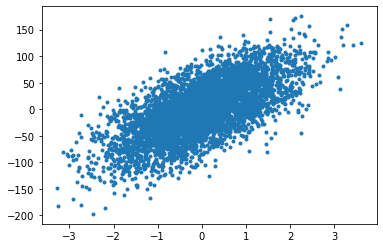

In [4]:
plt.plot(datar[:,0],target,'.')
plt.show()

In [5]:
datar.shape

(5000, 2)

In [6]:
coef

array([33.97219797, 37.21199725])

In [7]:
def mserror(X, w, y_pred):
    """
    функция для  вычисления среднеквадратичной ошибки
    """
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

__Градиентный спуск__

In [8]:
alpha = 0.1                # шаг обучения
W = np.zeros(n_fetures)    # начальный вектор весов
errors = []                # список значений ошибки после каждой итерации
W_list = [W.copy()]        # список векторов весов после каждой итерации
max_iter = 1e5             # максимальное количество итераций
min_weight_dist = 1e-8     # критерий сходимости
weight_dist = np.inf       # начальная разница весов
iter_num = 0               # счетчик
while weight_dist > min_weight_dist and iter_num < max_iter:
    W_pred = W - 2 * alpha * np.dot(datar.T, (np.dot(datar, W) - target)) / target.shape[0]
    weight_dist = np.linalg.norm(W_pred - W, ord=2)
    errors.append(mserror(datar, W_pred, target))
    W_list.append(W_pred.copy())
    iter_num += 1
    W = W_pred
#     alpha *= 0.99
W_list = np.array(W_list)

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 25.14


__Стохастический градиентный спуск__

In [9]:
alpha = 0.001
w = np.zeros(n_fetures)
err = []
w_list = [w.copy()]
max_iter = 1e4
min_weight_dist = 1e-8
weight_dist = np.inf
iter_num = 0
lamb = 0.01                      # коэфициент памяти
np.random.seed(1234)
Q = [mserror(datar, w, target)]  # список потерь

while weight_dist > min_weight_dist and iter_num < max_iter:
    train_ind = np.random.randint(datar.shape[0])
    
    new_w = w - 2 * alpha/(0+1) * np.dot(datar[train_ind].T, (np.dot(datar[train_ind], w) - target[train_ind]))
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    err.append(mserror(datar, new_w, target))
    Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(datar[train_ind], w) - target[train_ind])**2)
    iter_num += 1
    w = new_w
#     alpha *= 0.99
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет '
      f'{round(err[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 25.1402


__Графическая визуализация__

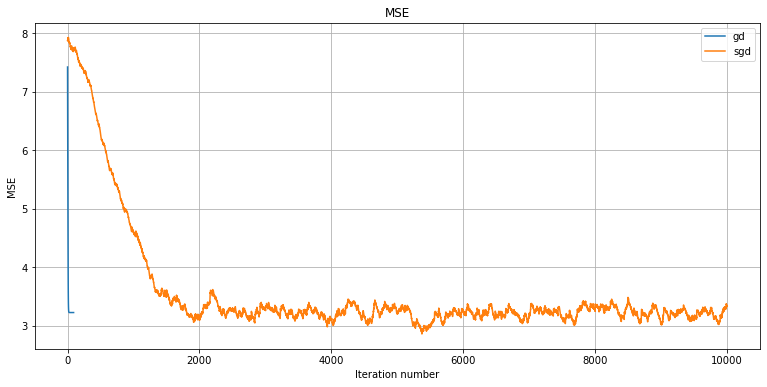

In [10]:
plt.figure(figsize=(13, 6))
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.plot(range(len(errors)), np.log(errors), label='gd')
plt.plot(range(len(Q)), np.log(Q), label='sgd')
plt.legend()
plt.grid(True)

plt.show()

__2__  
Модифицировать решение первого задания путем добавления 𝐿2-регуляризации (в функцию, считающую MSE добавить норму весов, а в поправку нужно добавить производную для нормы вектора весов по весам) и сравнить результаты.

In [11]:
alpha = 0.0015
w = np.zeros(n_fetures)
err = []
w_list = [w.copy()]
max_iter = 1e4
min_weight_dist = 1e-8
weight_dist = np.inf
iter_num = 0
lamb = 0.01 
np.random.seed(1234)
# Q = [mserror(datar, w, target)]

L2_lamb = 1e-2
QL2 = [np.sum((np.dot(datar, w) - target)**2)]

while weight_dist > min_weight_dist and iter_num < max_iter:
    train_ind = np.random.randint(datar.shape[0])
    L2 = 2 * L2_lamb * w
    dQ_dW = 2 * np.dot(datar[train_ind].T, np.dot(datar[train_ind], w) - target[train_ind])
    
    new_w = w - alpha * (L2 + dQ_dW)
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    err.append(mserror(datar, new_w, target))
#     Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(datar[train_ind], w) - target[train_ind])**2)
    QL2.append(QL2[-1]*(1-lamb)+lamb*((np.dot(datar[train_ind],w) - target[train_ind])**2 
                                      + L2_lamb * np.sum(np.square(new_w))))
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет '
      f'{round(err[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 25.3118


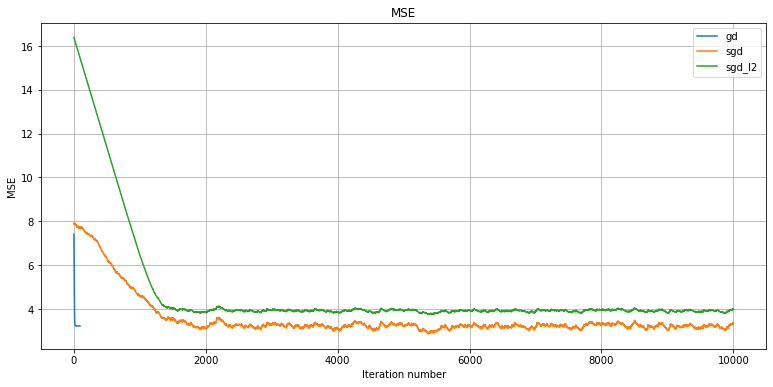

In [12]:
plt.figure(figsize=(13, 6))
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.plot(range(len(errors)), np.log(errors), label='gd')
plt.plot(range(len(Q)), np.log(Q), label='sgd')
plt.plot(range(len(QL2)), np.log(QL2), label='sgd_l2')
plt.legend()
plt.grid(True)

plt.show()

__Выводы:__  
Градиентный спуск позволяет производить обучение за меньшее число итераций, но требует большой объем вычислений на каждой итерации, поэтому в случае большого количества данных стохастический градиентный спуск является более предпочтительным. Также для повышения скорости сходимости возможно испольхование методов регуляризации.
